In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '../tests/')
sys.path.insert(0, '../')

In [3]:
import base

In [4]:
grid = base.get_grid()

m1 = base.create_circular_mask(grid, x_offset=-grid.lx/4.)
m2 = base.create_circular_mask(grid, x_offset=grid.lx/4.)

m = np.logical_or(m1, m2)

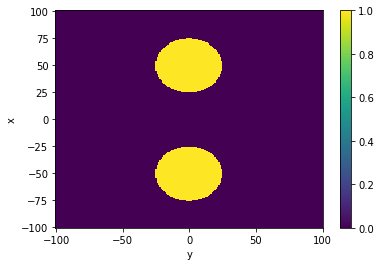

In [5]:
m.plot()

In [6]:
import cloud_identification

In [7]:
import test_pylib

In [8]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [9]:
from base import get_grid, create_circular_mask
from test_pylib import TestPythonInterface

<xarray.DataArray ()>
array(0.709317)


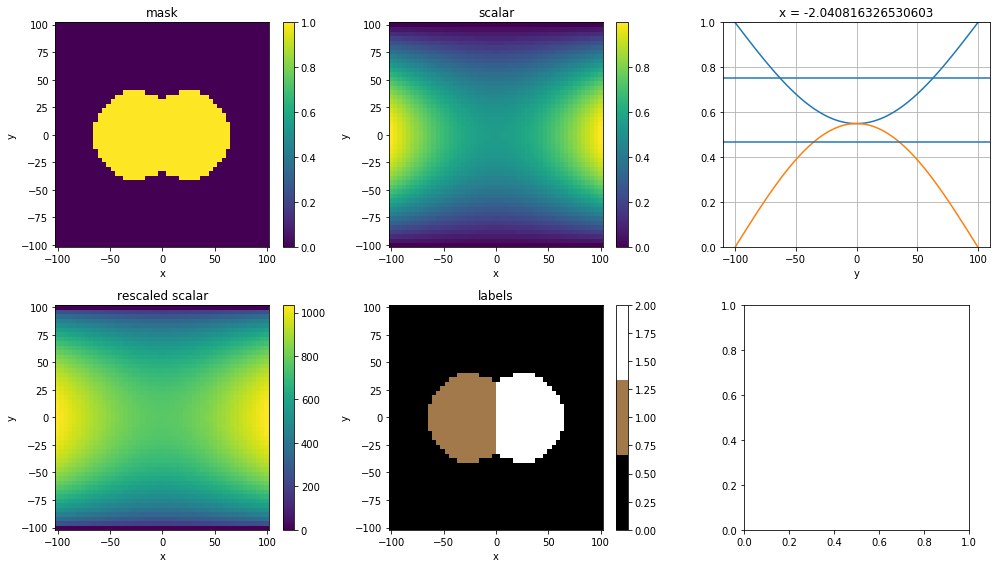

In [68]:
from scipy.constants import pi

class DummyTests(TestPythonInterface):
    def test_two_circles_x_periodic_scalar_field(self):
        grid = get_grid(N=50)
        x, y = grid.x, grid.y
        
        col_factor = 0.45
        
        col_min = 1.0 - col_factor

        d = (1.0 - np.cos(x*pi/grid.lx)*col_factor)*np.cos(y*pi/grid.lx)
        #d += 1.0e-10*np.random.random(size=d.shape)
        #d = 1. - np.cos((x+y)*pi/grid.lx)
        
        
        
        d = d.transpose('y', 'x')
        
        r_fraction = 0.2
        m1 = create_circular_mask(grid, x_offset=-grid.lx/8., r_fraction=r_fraction)
        m2 = create_circular_mask(grid, x_offset=grid.lx/8., r_fraction=r_fraction)
        m = np.logical_or(m1, m2)
        m = m.transpose('y', 'x')
        d_out = self.run_classifier(data=d, mask=m)
        d_scaled = cloud_identification.apply_scaling(np.expand_dims(d, axis=-1))

        fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14, 8))#, sharex='col', sharey='row')
        m.plot(ax=axes[0,0])
        axes[0,0].set_title('mask')
        
        labels = xr.DataArray(d_out[...,0], dims=m.dims, coords=m.coords)
        labels.plot.imshow(cmap=discrete_cmap(len(np.unique(labels)), 'cubehelix'), ax=axes[1,1])
        axes[1,1].set_title('labels')
        plt.gca().set_aspect(1)
        
        da_scaled = xr.DataArray(d_scaled[...,0], dims=m.dims, coords=m.coords)
        da_scaled.plot(ax=axes[1,0])
        axes[1,0].set_title('rescaled scalar')
        
        d.plot(ax=axes[0,1])
        axes[0,1].set_title('scalar')
        d.sel(y=0, method='nearest').plot(ax=axes[0,2])
        d.sel(x=0, method='nearest').plot(ax=axes[0,2])
        s_max, s_min = d.where(m, drop=True).max(), d.where(m, drop=True).min()
        axes[0,2].axhline(s_max)
        axes[0,2].axhline(s_min)
        
        print((s_max - col_min)/(s_max - s_min))

        axes[0,2].set_ylim(0, 1)
        axes[0,2].grid(True)

        num_regions = len(np.unique(d_out))

        assert num_regions == 3
        
        plt.tight_layout()

c = DummyTests()
c.test_two_circles_x_periodic_scalar_field()

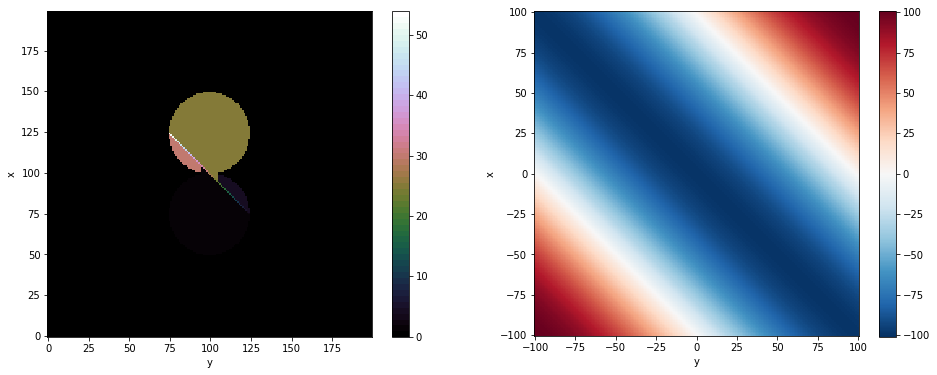

In [11]:
from scipy.constants import pi

class DummyTests(TestPythonInterface):
    def test_two_circles_x_periodic_scalar_field(self):
        grid = get_grid()
        x, y = grid.x, grid.y

        d = 1. - np.cos((x+y)*pi/grid.lx)*100
        #d = np.random.random(size=d.shape)*10

        r_fraction = 0.125
        m1 = create_circular_mask(grid, x_offset=-grid.lx/8., r_fraction=r_fraction)
        m2 = create_circular_mask(grid, x_offset=grid.lx/8., r_fraction=r_fraction)
        m = np.logical_or(m1, m2)
        
        fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
        
        d_out = self.run_classifier(data=d, mask=m)
        
        labels = xr.DataArray(d_out[...,0], dims=m.dims)
        labels.plot.imshow(cmap=discrete_cmap(len(np.unique(labels)), 'cubehelix'), ax=axes[0])
        plt.gca().set_aspect(1)
        
        d.plot(ax=axes[1])

        num_regions = len(np.unique(d_out))

        #assert num_regions == 5

c = DummyTests()
c.test_two_circles_x_periodic_scalar_field()

In [12]:
c = test_pylib.TestPythonInterface()
labels = c._test_two_circles_same_scalar_value()
labels

AssertionError: 

In [ ]:
#%debug

In [ ]:
labels.plot(size=14, cmap=discrete_cmap(len(np.unique(labels)), 'cubehelix'))
plt.gca().set_aspect(1)